# RandomForest sur données abiotiques

## Données

In [337]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from collections import Counter


In [338]:
abio = pd.read_csv('C:/Users/mbrei/OneDrive/Bureau/TER/enviroTab_pa_train.csv', sep=';')

In [339]:
species = pd.read_csv('C:/Users/mbrei/OneDrive/Bureau/TER/Presences_Absences_train.csv', sep=';')

In [4]:
abio

,patchID,dayOfYear,lon,lat,x_EPSG3035,y_EPSG3035,year,dataset,geoUncertaintyInM,bio1,...,Built1994,Lights1994,NavWater1994,Built2009,Lights2009,NavWater2009,Popdensity1990,Popdensity2010,Railways,Roads
0,55880,126,4.74408,44.20370,3.900369e+06,2.358486e+06,2020,CBNMed,10.0,2878,...,0.0,7.0,0.357577,10.0,8.0,0.357577,6.0,6.0,0.0,1.629548
1,55897,126,4.74436,44.20410,3.900395e+06,2.358529e+06,2020,CBNMed,10.0,2878,...,0.0,7.0,0.357577,10.0,8.0,0.357577,6.0,6.0,0.0,1.629548
2,55942,126,4.74519,44.20360,3.900457e+06,2.358469e+06,2020,CBNMed,10.0,2878,...,0.0,7.0,0.357577,10.0,8.0,0.357577,6.0,6.0,0.0,1.629548
3,56533,126,4.75466,44.21930,3.901329e+06,2.360153e+06,2020,CBNMed,10.0,2876,...,0.0,4.0,0.144801,0.0,5.0,0.144801,6.0,6.0,0.0,0.852498
4,56759,126,4.75755,44.21360,3.901518e+06,2.359506e+06,2020,CBNMed,10.0,2877,...,0.0,4.0,0.144801,0.0,5.0,0.144801,6.0,6.0,0.0,0.852498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,3018845,138,9.28662,41.87388,4.261560e+06,2.085921e+06,2018,Inventaire forestier IGN,1.0,2839,...,0.0,0.0,0.002858,0.0,0.0,0.002858,2.0,2.0,0.0,0.757507
5944,3018847,351,9.29834,41.56691,4.262244e+06,2.051949e+06,2018,Inventaire forestier IGN,1.0,2898,...,0.0,3.0,1.281452,0.0,6.0,1.281452,5.0,6.0,0.0,1.629548
5945,3018848,346,9.31529,41.70986,4.263796e+06,2.067751e+06,2017,Inventaire forestier IGN,1.0,2894,...,0.0,1.0,0.042134,0.0,1.0,0.042134,4.0,4.0,0.0,4.000000
5946,3018853,346,9.35871,41.67093,4.267389e+06,2.063412e+06,2018,Inventaire forestier IGN,1.0,2897,...,0.0,3.0,1.788531,0.0,4.0,1.788531,3.0,4.0,0.0,0.526984


In [5]:
species

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
0,5140269,3.473385e+09,(IGN),Inventaire forestier IGN,31/01/2018,31,2018,7.300790,48.29273,4.120673e+06,2.801353e+06,1.0,6574,3018575,3980325
1,5279421,3.474159e+09,(IGN),Inventaire forestier IGN,19/07/2017,200,2017,1.483390,42.92599,3.625340e+06,2.241565e+06,1.0,6574,3011783,3980331
2,5058088,3.475680e+09,(IGN),Inventaire forestier IGN,26/09/2017,269,2017,6.739570,47.39633,4.074778e+06,2.703502e+06,1.0,6574,3018192,3980335
3,5146840,3.476162e+09,(IGN),Inventaire forestier IGN,20/09/2017,263,2017,4.587140,45.40615,3.897015e+06,2.492494e+06,1.0,6574,3015541,3980336
4,5255062,3.475124e+09,(IGN),Inventaire forestier IGN,18/09/2019,261,2019,6.955830,47.74829,4.092660e+06,2.741886e+06,1.0,6574,3018391,3980351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85320,5320539,NaN,NaN,CBNMed,1621461600,140,2021,5.094570,44.18660,3.928254e+06,2.354689e+06,10.0,9456,76900,3993145
85321,5392608,NaN,NaN,CBNMed,1497909600,171,2017,5.781197,43.74345,3.980545e+06,2.302273e+06,10.0,9456,94452,3986894
85322,5353058,NaN,NaN,CBNMed,1621461600,140,2021,5.094620,44.18680,3.928259e+06,2.354711e+06,10.0,9456,76905,3993923
85323,5102872,2.907311e+09,"Shoesmith, J. Judith",Nat. plant monitoring UK,07/06/2017,158,2017,0.785642,51.70740,3.686016e+06,3.217623e+06,7.1,6081,3010687,3990777


### Regrouper speciesId et patchID

In [340]:
species_patch = species.groupby('speciesId')['patchID'].agg(list).reset_index()
species_patch

,speciesId,patchID
0,1,"[84011, 117034, 84134]"
1,5,"[3011283, 3015779, 3018383, 3012915, 3018526, ..."
2,10,"[71796, 106271, 76604, 79151, 82888]"
3,11,"[3010676, 3003513, 3010694, 3004693, 3012730, ..."
4,24,"[3007117, 3012731, 3011311, 3011502, 3007122, ..."
...,...,...
2169,10028,"[70138, 80792, 80791]"
2170,10031,[128394]
2171,10035,"[3015833, 78456, 3012387, 3015966, 3015532, 30..."
2172,10038,[83959]


In [148]:
Counter(species_patch[species_patch['speciesId']==1]["patchID"].iloc[0])

Counter({84011: 1, 117034: 1, 84134: 1})

### Création d'un df de présence pour chaque espèce

In [214]:
abiotrain = np.array([])
abiotrain = abio.copy()

In [215]:
#patch_ids_associated 
species_patch['patchID'].iloc[0]

[84011, 117034, 84134]

In [216]:
patch_ids_associated = species_patch['patchID'].iloc[2172]
abiotrain['patchID'].isin(patch_ids_associated).astype(int).sum()


1

In [217]:
for i in range(len(species_patch['patchID'])):
        patch_ids_associated = species_patch['patchID'].iloc[i]
        abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)


C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abiotrain[str(species_patch['speciesId'].loc[i])] = abiotrain['patchID'].isin(patch_ids_associated).astype(int)
C:\Users\mbrei\AppData\Local\Temp\ipykernel_16844\2231048062.py:3: PerformanceWarnin

In [228]:
abiotrain

,patchID,dayOfYear,lon,lat,x_EPSG3035,y_EPSG3035,year,dataset,geoUncertaintyInM,bio1,...,10013,10019,10023,10024,10025,10028,10031,10035,10038,10039
0,55880,126,4.74408,44.20370,3.900369e+06,2.358486e+06,2020,CBNMed,10.0,2878,...,0,0,0,0,0,0,0,0,0,0
1,55897,126,4.74436,44.20410,3.900395e+06,2.358529e+06,2020,CBNMed,10.0,2878,...,0,0,0,0,0,0,0,0,0,0
2,55942,126,4.74519,44.20360,3.900457e+06,2.358469e+06,2020,CBNMed,10.0,2878,...,0,0,0,0,0,0,0,0,0,0
3,56533,126,4.75466,44.21930,3.901329e+06,2.360153e+06,2020,CBNMed,10.0,2876,...,0,0,0,0,0,0,0,0,0,0
4,56759,126,4.75755,44.21360,3.901518e+06,2.359506e+06,2020,CBNMed,10.0,2877,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,3018845,138,9.28662,41.87388,4.261560e+06,2.085921e+06,2018,Inventaire forestier IGN,1.0,2839,...,0,0,0,0,0,0,0,0,0,0
5944,3018847,351,9.29834,41.56691,4.262244e+06,2.051949e+06,2018,Inventaire forestier IGN,1.0,2898,...,0,0,0,0,0,0,0,0,0,0
5945,3018848,346,9.31529,41.70986,4.263796e+06,2.067751e+06,2017,Inventaire forestier IGN,1.0,2894,...,0,0,0,0,0,0,0,0,0,0
5946,3018853,346,9.35871,41.67093,4.267389e+06,2.063412e+06,2018,Inventaire forestier IGN,1.0,2897,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Variables qualitatives rempli par 0 et variables quanti rempli par moyenne:

In [235]:
varquali = pd.concat([abiotrain.iloc[:, 37:40], abiotrain.iloc[:, 41:43], abiotrain.iloc[:, 44:47]], axis=1)

abiotrain.loc[:, varquali.columns] = abiotrain.loc[:, varquali.columns].fillna(0)

abiotrain.iloc[:, 9:48] = abiotrain.iloc[:, 9:48].fillna(abiotrain.iloc[:, 9:48].mean())

In [300]:
varquali

,landCov,Built1994,Lights1994,Built2009,Lights2009,Popdensity1990,Popdensity2010,Railways
0,1,0.0,7.0,10.0,8.0,6.0,6.0,0.0
1,1,0.0,7.0,10.0,8.0,6.0,6.0,0.0
2,1,0.0,7.0,10.0,8.0,6.0,6.0,0.0
3,8,0.0,4.0,0.0,5.0,6.0,6.0,0.0
4,8,0.0,4.0,0.0,5.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...,...
5943,1,0.0,0.0,0.0,0.0,2.0,2.0,0.0
5944,1,0.0,3.0,0.0,6.0,5.0,6.0,0.0
5945,2,0.0,1.0,0.0,1.0,4.0,4.0,0.0
5946,2,0.0,3.0,0.0,4.0,3.0,4.0,0.0


In [319]:
abiotrain.loc[:,varquali.columns] = abiotrain.loc[:,varquali.columns].astype('category')

In [325]:
abiotrain.iloc[:,9:48].dtypes

bio1                 int64
bio2                 int64
bio3               float64
bio4                 int64
bio5                 int64
bio6                 int64
bio7                 int64
bio8                 int64
bio9                 int64
bio10                int64
bio11                int64
bio12                int64
bio13                int64
bio14                int64
bio15                int64
bio16                int64
bio17                int64
bio18                int64
bio19                int64
bdod               float64
cec                float64
cfvo               float64
clay               float64
nitrogen           float64
phh2o              float64
sand               float64
silt               float64
soc                float64
landCov           category
Built1994         category
Lights1994        category
NavWater1994       float64
Built2009         category
Lights2009        category
NavWater2009       float64
Popdensity1990    category
Popdensity2010    category
R

## Test modèle sur données train pour une espèce 

In [226]:
X = abiotrain.iloc[:,9:28].values
Y = abiotrain.iloc[:,48].values  # espèceID = 1

In [227]:
Counter(abiotrain.iloc[:,48])

Counter({0: 5945, 1: 3})

In [17]:
print('Variables quantitatives: ')
print(X)
print('Variables qualitatives: ')
print(Y)

Variables quantitatives: 
[[2.87800000e+03 9.50000000e+01 3.32999992e+00 ... 1.28400000e+03
  1.28400000e+03 1.55900000e+03]
 [2.87800000e+03 9.50000000e+01 3.32999992e+00 ... 1.28400000e+03
  1.28400000e+03 1.55900000e+03]
 [2.87800000e+03 9.50000000e+01 3.32999992e+00 ... 1.28400000e+03
  1.28400000e+03 1.55900000e+03]
 ...
 [2.89400000e+03 7.60000000e+01 3.08999991e+00 ... 5.35000000e+02
  5.35000000e+02 2.30800000e+03]
 [2.89700000e+03 6.20000000e+01 2.79999995e+00 ... 4.96000000e+02
  4.96000000e+02 2.26000000e+03]
 [2.90100000e+03 7.00000000e+01 2.95000005e+00 ... 7.29000000e+02
  7.29000000e+02 2.32500000e+03]]
Variables qualitatives: 
[0 0 0 ... 0 0 0]


### Séparation des données

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [33]:
Counter(Y_test)

Counter({0: 1784, 1: 1})

In [34]:
#Modèle
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [35]:
#Prédiction
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9994397759103641

## Test modèle sur données test

In [422]:
# Données test
abiotest = pd.read_csv('C:/Users/mbrei/OneDrive/Bureau/TER/enviroTab_pa_test.csv', sep=';')
abiotest.head()

,Id,datasetName,dayOfYear,year,patchID,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,...,Built1994,Lights1994,NavWater1994,Built2009,Lights2009,NavWater2009,Popdensity1990,Popdensity2010,Railways,Roads
0,1,CBNMed,228,2021,10125,1.729607,42.52171,3640762.0,2194746.0,5.0,...,0,5,0.0,10,9,0.0,5,6,0,1.629548
1,2,CBNMed,228,2021,10126,1.729624,42.52177,3640764.0,2194753.0,4.0,...,0,5,0.0,10,9,0.0,5,6,0,1.629548
2,3,CBNMed,228,2021,10127,1.729652,42.52197,3640769.0,2194775.0,5.0,...,0,5,0.0,10,9,0.0,5,6,0,1.629548
3,4,CBNMed,228,2021,10129,1.729671,42.52192,3640770.0,2194769.0,6.0,...,0,5,0.0,10,9,0.0,5,6,0,1.629548
4,5,CBNMed,193,2018,10154,1.826847,42.57452,3649316.0,2199695.0,0.0,...,0,0,0.0,0,2,0.0,1,2,0,2.728224


In [425]:
X = abiotrain.iloc[:,9:48].values
Y = abiotrain.iloc[:,51].values

In [426]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [427]:
# Créez un transformateur de colonnes pour appliquer les transformations nécessaires
#preprocessor = ColumnTransformer(
 #   transformers=[
 #       ('cat', OneHotEncoder(), indice)
  #  ],
 #   remainder='passthrough'
#)

# Appliquez les transformations
#X = preprocessor.fit_transform(X)

In [428]:
from collections import Counter
Counter(Y)

Counter({0: 5927, 1: 21})

In [429]:
model1 = RandomForestClassifier(n_estimators=10, bootstrap=False)
model1.fit(X, Y)

RandomForestClassifier(bootstrap=False, n_estimators=10)

In [378]:
Y_prob = model1.predict_proba(X_test)
Y_pred = model1.predict(X_test)

In [379]:
Y_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [380]:
for couple in Y_prob:
    if couple[1]>0.2:
        print(couple)

[0.7 0.3]
[0.7 0.3]
[0.7 0.3]


### Plot de l'arbre 

In [381]:
abiotrain.iloc[3770:3780, :]

,patchID,dayOfYear,lon,lat,x_EPSG3035,y_EPSG3035,year,dataset,geoUncertaintyInM,bio1,...,10013,10019,10023,10024,10025,10028,10031,10035,10038,10039
3770,3010676,249,0.780350,51.706084,3.685635e+06,3.217524e+06,2017,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3771,3010677,143,0.780350,51.706084,3.685635e+06,3.217524e+06,2019,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3772,3010677,243,0.780350,51.706084,3.685635e+06,3.217524e+06,2019,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3773,3010683,158,0.783124,51.706470,3.685830e+06,3.217542e+06,2017,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3774,3010683,249,0.783124,51.706470,3.685830e+06,3.217542e+06,2017,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3775,3010684,143,0.783124,51.706468,3.685830e+06,3.217542e+06,2019,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3776,3010684,243,0.783124,51.706468,3.685830e+06,3.217542e+06,2019,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3777,3010687,158,0.785642,51.707400,3.686016e+06,3.217623e+06,2017,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3778,3010687,249,0.785642,51.707400,3.686016e+06,3.217623e+06,2017,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0
3779,3010688,143,0.785642,51.707398,3.686016e+06,3.217623e+06,2019,Nat. plant monitoring UK,7.1,2839,...,0,0,0,0,0,0,0,0,0,0


In [485]:
result = pd.concat([
    abiotrain.iloc[3770:3774, [0]],      
    abiotrain.iloc[3770:3774, 11:15],
    abiotrain.iloc[3770:3774, 43:46],
    abiotrain.iloc[3770:3774, [51]]
], axis=1)

result.iloc[1:3,4:5]=2500

def color_score(val):
    if val == 1:
        color = 'lightgreen'
    else:
        color = 'lightred'
    return f'background-color: {color};'

def color_score2(val):
    if val == 2500:
        color = 'lightpink'
    else:
        color = ''
    return f'background-color: {color};'

def color_score3(val):
    if val == 2760:
        color = 'lightgreen'
    else:
        color = ''
    return f'background-color: {color};'

def color_score4(val):
    if val == 0:
        color = 'lightpink'
    else:
        color = ''
    return f'background-color: {color};'


# Appliquer la fonction de style à la colonne 'Score'
result = result.style.applymap(color_score).applymap(color_score2).applymap(color_score3).applymap(color_score4)

In [486]:
result

,patchID,bio3,bio4,bio5,bio6,NavWater2009,Popdensity1990,Popdensity2010,11
3770,3010676,2.880000,4422,2935,2760,0.008707,7.000000,7.000000,1
3771,3010677,2.880000,4422,2935,2500,0.008707,7.000000,7.000000,0
3772,3010677,2.880000,4422,2935,2500,0.008707,7.000000,7.000000,0
3773,3010683,2.880000,4422,2935,2760,0.008707,7.000000,7.000000,1


In [484]:
poids_var = pd.DataFrame(model1.feature_importances_,
              index = abiotrain.columns[9:48], 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)
pd.concat([poids_var[0:5],poids_var[38:40]])

,importance
bio19,0.105165
bio13,0.070547
phh2o,0.068213
Lights2009,0.065239
bio16,0.061372
Built1994,0.000000


In [487]:
model1.classes_
classe=["Absences", "Présences"]

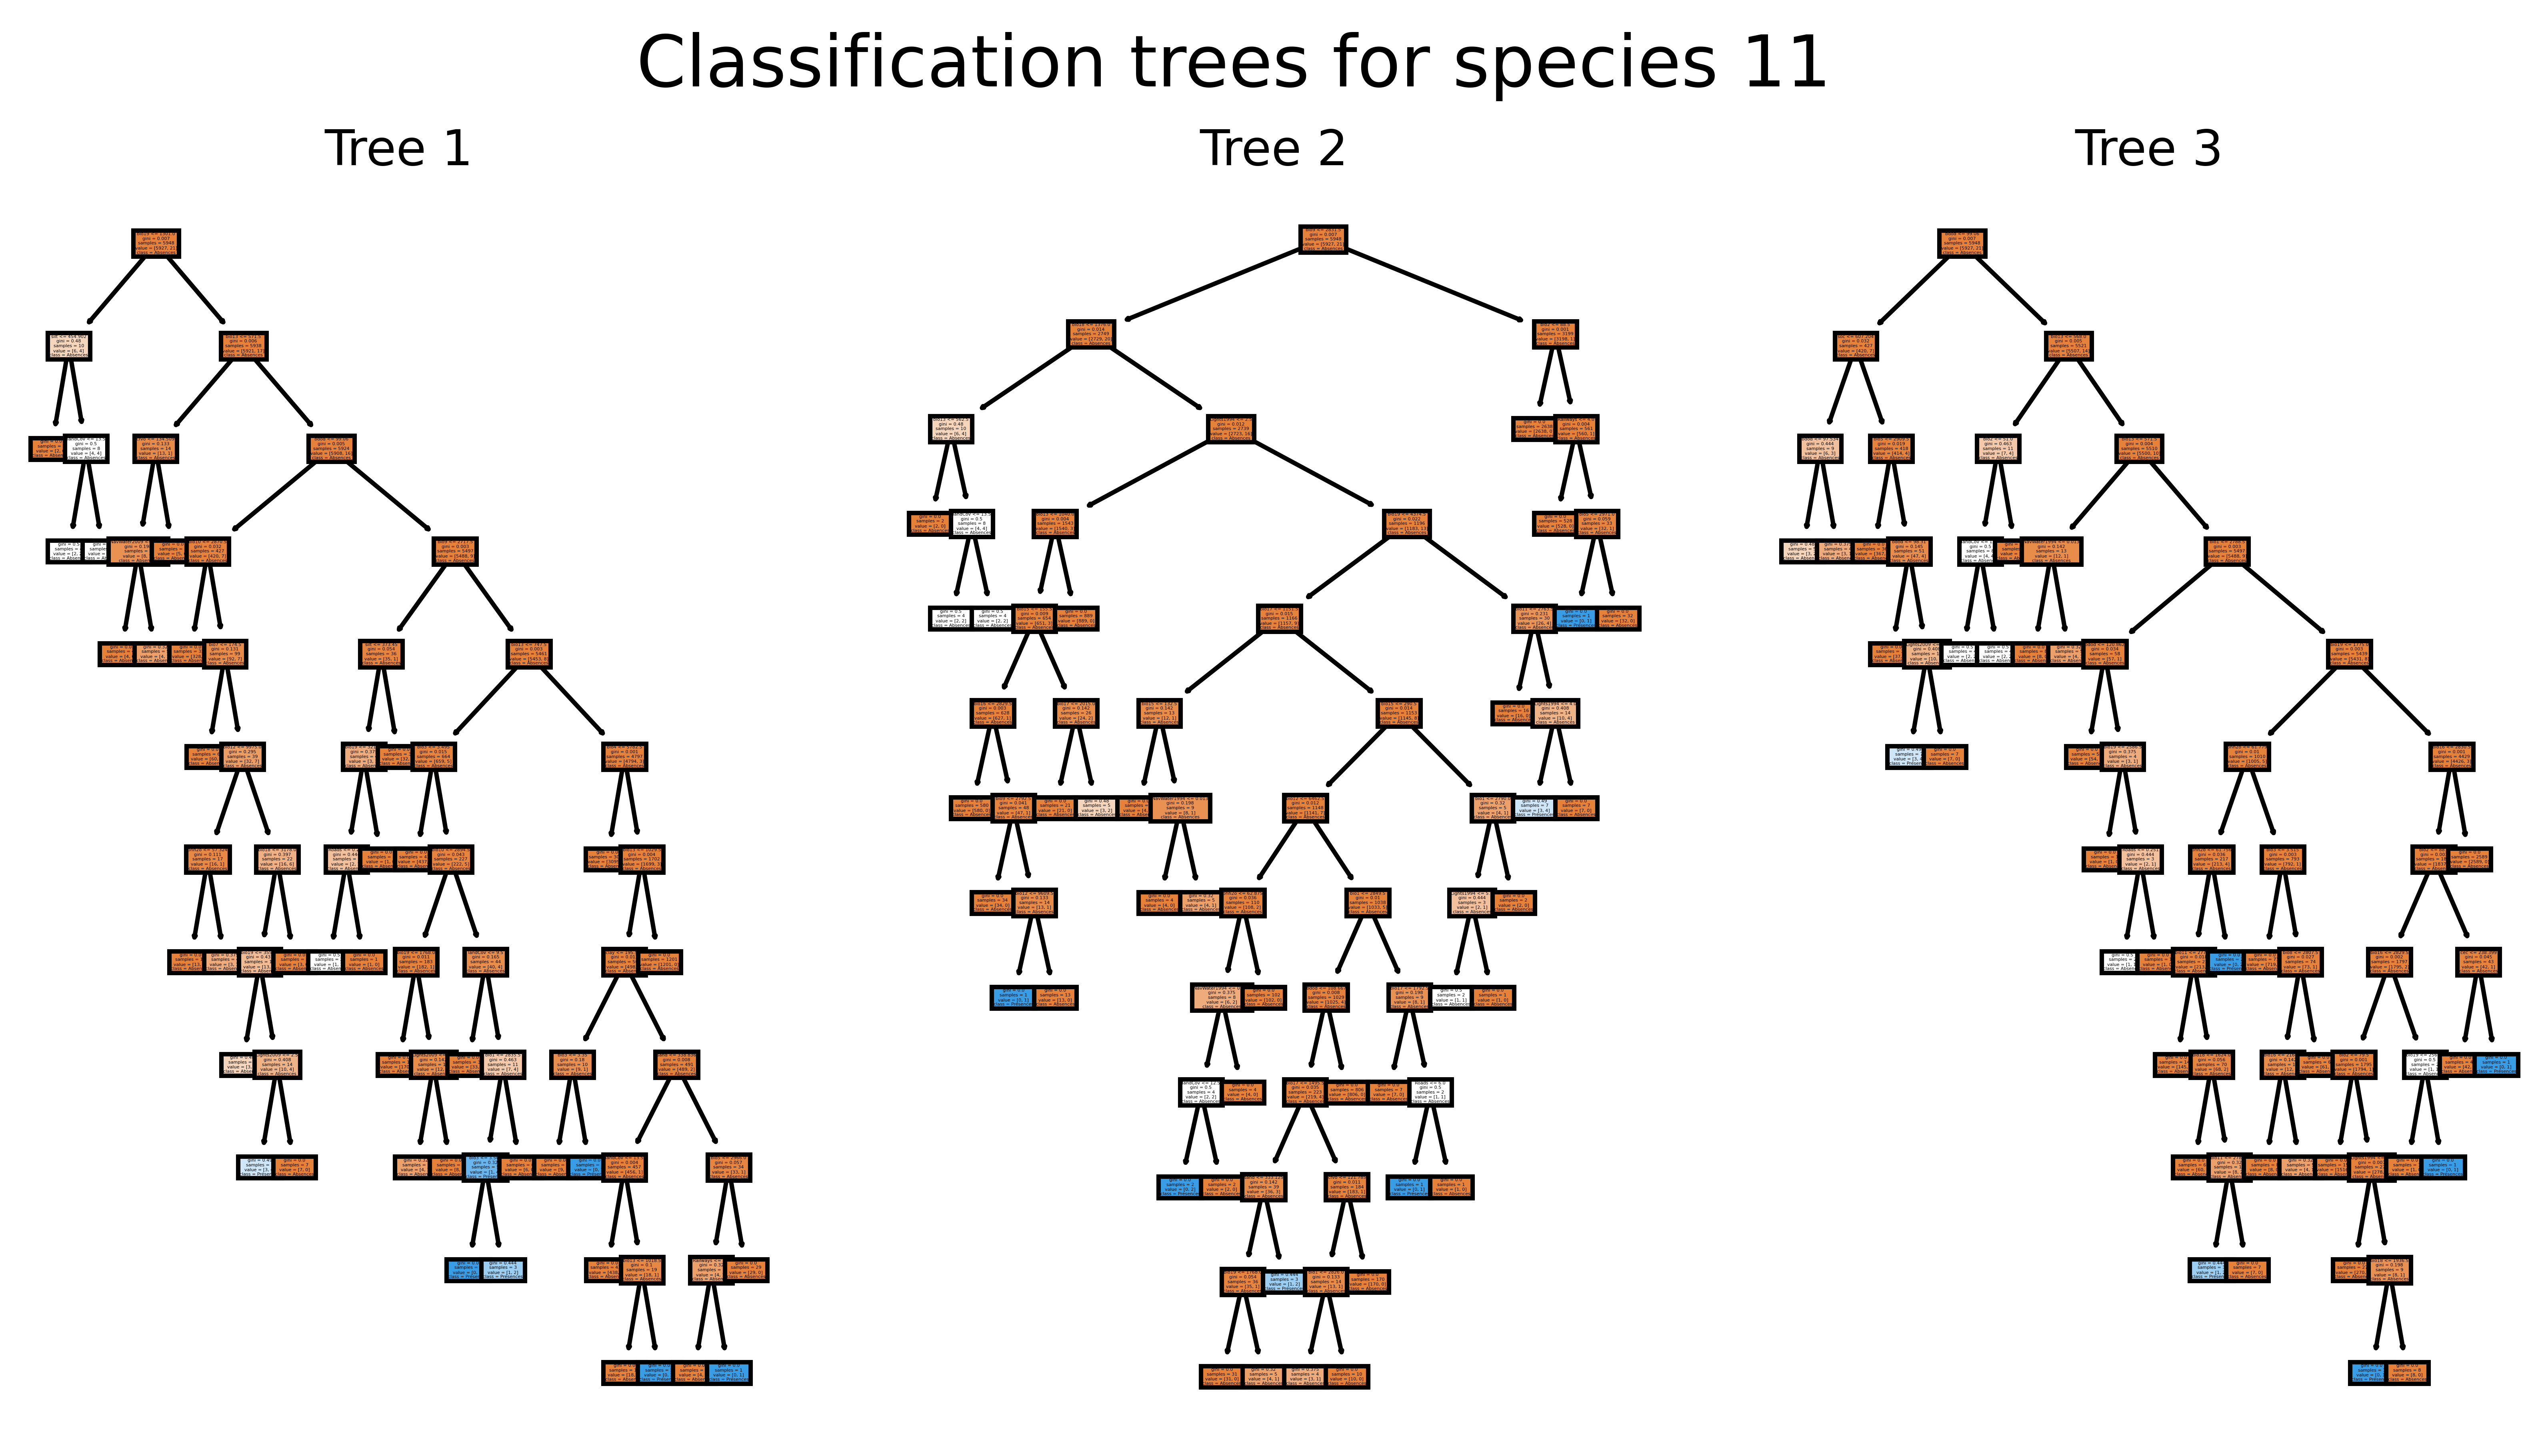

In [488]:
import matplotlib.pyplot as plt
from sklearn import tree

fn=abiotrain.columns[9:48].tolist()
cn=classe

fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,5), dpi=800)
for index in range(0, 3):
    tree.plot_tree(model1.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    axes[index].set_title('Tree ' + str(index+1), fontsize = 11)
        
fig.suptitle("Classification trees for species 11", fontsize=16)
fig.savefig('rf_5tree.png')

# Modèle pour chaque espèce

In [326]:
X_test = abiotest.iloc[:,10:49].values
abiotrain.iloc[:,9:48]

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,Built1994,Lights1994,NavWater1994,Built2009,Lights2009,NavWater2009,Popdensity1990,Popdensity2010,Railways,Roads
0,2878,95,3.33,6635,3032,2747,285,2880,2967,2967,...,0.0,7.0,0.357577,10.0,8.0,0.357577,6.0,6.0,0.0,1.629548
1,2878,95,3.33,6635,3032,2747,285,2880,2967,2967,...,0.0,7.0,0.357577,10.0,8.0,0.357577,6.0,6.0,0.0,1.629548
2,2878,95,3.33,6635,3032,2747,285,2880,2967,2967,...,0.0,7.0,0.357577,10.0,8.0,0.357577,6.0,6.0,0.0,1.629548
3,2876,95,3.33,6614,3031,2746,285,2879,2965,2965,...,0.0,4.0,0.144801,0.0,5.0,0.144801,6.0,6.0,0.0,0.852498
4,2877,95,3.33,6635,3031,2746,285,2879,2966,2966,...,0.0,4.0,0.144801,0.0,5.0,0.144801,6.0,6.0,0.0,0.852498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,2839,86,3.31,5862,2981,2723,258,2812,2918,2918,...,0.0,0.0,0.002858,0.0,0.0,0.002858,2.0,2.0,0.0,0.757507
5944,2898,40,2.14,5081,3000,2815,185,2879,2965,2967,...,0.0,3.0,1.281452,0.0,6.0,1.281452,5.0,6.0,0.0,1.629548
5945,2894,76,3.09,5864,3030,2785,245,2866,2973,2973,...,0.0,1.0,0.042134,0.0,1.0,0.042134,4.0,4.0,0.0,4.000000
5946,2897,62,2.80,5587,3021,2798,223,2872,2972,2972,...,0.0,3.0,1.788531,0.0,4.0,1.788531,3.0,4.0,0.0,0.526984


In [382]:
%%time
predictions={}
model = RandomForestClassifier(n_estimators=50,bootstrap=False)
X = abiotrain.iloc[:,9:48].values

for i in range(len(species_patch)-1):
    Y = abiotrain.iloc[:,48+i].values
    model.fit(X, Y)
    Y_pred = model.predict_proba(X_test)[:,1]
    species_name = abiotrain.columns[48+i] 
    predictions[species_name] = Y_pred
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [383]:
predictions

{'1': array([0.  , 0.  , 0.  , ..., 0.  , 0.02, 0.  ]),
 '5': array([0., 0., 0., ..., 0., 0., 0.]),
 '10': array([0.        , 0.        , 0.        , ..., 0.02666667, 0.00285714,
        0.        ]),
 '11': array([0.   , 0.   , 0.   , ..., 0.005, 0.   , 0.   ]),
 '24': array([0.02, 0.02, 0.02, ..., 0.  , 0.02, 0.02]),
 '28': array([0., 0., 0., ..., 0., 0., 0.]),
 '33': array([0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ]),
 '37': array([0.        , 0.        , 0.        , ..., 0.00695652, 0.        ,
        0.        ]),
 '38': array([0.04, 0.04, 0.04, ..., 0.  , 0.  , 0.  ]),
 '55': array([0.016, 0.016, 0.016, ..., 0.   , 0.   , 0.   ]),
 '56': array([0., 0., 0., ..., 0., 0., 0.]),
 '76': array([0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.06]),
 '95': array([0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.  ]),
 '99': array([0.08375, 0.08375, 0.08375, ..., 0.     , 0.02   , 0.     ]),
 '101': array([0.  , 0.  , 0.  , ..., 0.15, 0.  , 0.  ]),
 '103': array([0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ]),
 '114'

In [384]:
# Sortie en excel
df_predictions = pd.DataFrame(predictions)

#Ajoute id
#df_predictions.insert(0, "id", range(1, len(df_predictions) + 1))

In [385]:
df_predictions

,1,5,10,11,24,28,33,37,38,55,...,10005,10013,10019,10023,10024,10025,10028,10031,10035,10038
0,0.00,0.0,0.000000,0.000,0.020000,0.0,0.02,0.000000,0.04,0.016,...,0.000,0.02,0.04,0.0,0.12,0.0,0.0,0.0,0.000000,0.0
1,0.00,0.0,0.000000,0.000,0.020000,0.0,0.02,0.000000,0.04,0.016,...,0.000,0.02,0.04,0.0,0.12,0.0,0.0,0.0,0.000000,0.0
2,0.00,0.0,0.000000,0.000,0.020000,0.0,0.02,0.000000,0.04,0.016,...,0.000,0.02,0.04,0.0,0.12,0.0,0.0,0.0,0.000000,0.0
3,0.00,0.0,0.000000,0.000,0.020000,0.0,0.02,0.000000,0.04,0.016,...,0.000,0.02,0.04,0.0,0.12,0.0,0.0,0.0,0.000000,0.0
4,0.00,0.0,0.000000,0.010,0.100000,0.0,0.02,0.000000,0.04,0.000,...,0.000,0.00,0.00,0.0,0.26,0.0,0.0,0.0,0.140000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22399,0.00,0.0,0.000000,0.000,0.054667,0.0,0.00,0.000000,0.05,0.000,...,0.000,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0
22400,0.00,0.0,0.000000,0.000,0.172000,0.0,0.00,0.000000,0.00,0.000,...,0.000,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0
22401,0.00,0.0,0.026667,0.005,0.000000,0.0,0.00,0.006957,0.00,0.000,...,0.120,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.002222,0.0
22402,0.02,0.0,0.002857,0.000,0.020000,0.0,0.00,0.000000,0.00,0.000,...,0.000,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0


In [386]:
df_predictions.iloc[:,0:10].sum()

1       63.506667
5      139.800000
10     106.776667
11     225.797667
24    2805.405048
28      83.746667
33      60.540000
37     111.307391
38     585.876454
55      27.460000
dtype: float64

In [417]:
def replace_with_column_name(row):
    return [col for col, value in row.items() if value >= 0.235]

# Appliquez la fonction uniquement aux colonnes sélectionnées
new_df = df_predictions.apply(replace_with_column_name, axis=1)

In [418]:
new_df

0        [155, 385, 386, 593, 747, 849, 980, 1216, 1258...
1        [155, 385, 386, 593, 747, 849, 980, 1216, 1258...
2        [155, 385, 386, 593, 747, 849, 980, 1216, 1258...
3        [155, 385, 386, 593, 747, 849, 980, 1216, 1258...
4        [385, 386, 405, 747, 849, 980, 1005, 1283, 150...
                               ...                        
22399       [265, 271, 1005, 2749, 3069, 5959, 8406, 9679]
22400    [265, 268, 271, 1005, 2749, 2854, 3069, 3994, ...
22401    [145, 244, 265, 271, 515, 644, 1267, 2033, 271...
22402    [265, 268, 271, 751, 1364, 2033, 2749, 2918, 3...
22403    [145, 265, 271, 662, 1083, 1267, 1826, 1830, 2...
Length: 22404, dtype: object

In [419]:
#Liste des speciesId pour une ligne
new_df = pd.DataFrame(new_df)
new_df.insert(0, "id", range(1, len(new_df) + 1))


In [420]:
new_df = new_df.rename(columns={new_df.columns[1]: "Predict"})

In [421]:
blind = new_df.rename(columns={'Predict': 'Predicted'})
blind['Predicted'] = blind['Predicted'].apply(lambda x: str(x).replace('[', '').replace(']', '').replace(',', '').replace("'",''))
blind.to_csv("RF_50_final_prob0235_bt.csv", index=False, sep=',')

In [307]:
blind

,id,Predicted
0,1,747 876 1258 2336 2790 5169 6166 6273 7243 772...
1,2,747 876 1258 2336 2790 5169 6166 6273 7243 772...
2,3,747 876 1258 2336 2790 5169 6166 6273 7243 772...
3,4,747 876 1258 2336 2790 5169 6166 6273 7243 772...
4,5,385 405 747 1503 1827 1913 4413 5707 6060 6715...
...,...,...
22399,22400,3069 8935 9679
22400,22401,1005 3069 8935
22401,22402,265 2716 3800 3833 4062 4634 5400 5815 8994 9983
22402,22403,265 1364 3833 4904 5400 7787 8994
